In [4]:
%pwd

u'/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1'

In [4]:
#Create references to important directories we will use over and over
import os, sys
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir+'/data/stateFarm'

In [5]:
#Allow relative imports to directories above lesson1/
sys.path.insert(1, os.path.join(sys.path[0], '..'))

#import modules
from utils import *
from vgg16 import Vgg16

#Instantiate plotting tool
#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [7]:
#Create directories
%cd $DATA_HOME_DIR
%mkdir valid
%mkdir results
%mkdir -p sample/train
%mkdir -p sample/test
%mkdir -p sample/valid
%mkdir -p sample/results
%mkdir -p test/unknown

/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm


In [8]:
%cd $DATA_HOME_DIR/train

/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train


In [13]:
for i in range(10):
    %cd $DATA_HOME_DIR/train
    category = "c%d/" % i
    %mkdir -p $DATA_HOME_DIR/valid/$category
    %cd $category
    g = glob("*.jpg")
    shuf = np.random.permutation(g)
    for j in range(200): os.rename( shuf[j], DATA_HOME_DIR+'/valid/' + category + shuf[j])
    

/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train/c0
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train/c1
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train/c2
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train/c3
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train/c4
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train/c5
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/

In [14]:
from shutil import copyfile

In [15]:
for i in range(10):
    %cd $DATA_HOME_DIR/train
    category = "c%d/" % i
    %mkdir -p ../sample/train/$category
    %mkdir -p ../sample/valid/$category
    %cd $category
    g = glob("*.jpg")
    shuf = np.random.permutation(g)
    for j in range(20): copyfile(shuf[j], DATA_HOME_DIR+'/sample/train/' + category + shuf[j])
    for j in range(20,24): copyfile(shuf[j], DATA_HOME_DIR+'/sample/valid/' + category + shuf[j])

/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train/c0
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train/c1
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train/c2
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train/c3
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train/c4
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/train/c5
/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/

In [16]:
# Create single 'unknown' class for test set
%cd $DATA_HOME_DIR/test
%mv *.jpg unknown/

/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm/test


## Finetuning and Training

In [6]:
%cd $DATA_HOME_DIR

#Set path to sample/ path if desired
path = DATA_HOME_DIR + '/' #'/sample/'
test_path = DATA_HOME_DIR + '/test/' #We use all the test data
results_path=DATA_HOME_DIR + '/results/'
train_path=path + '/train/'
valid_path=path + '/valid/'

/home/ubuntu/fast-ai/courses/deeplearning1/nbs/lesson1/data/stateFarm


In [7]:
#import Vgg16 helper class
vgg = Vgg16()

In [8]:
#Set constants. You can experiment with no_of_epochs to improve the model
batch_size=64
no_of_epochs=3

In [28]:
#Finetune the model
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size*2)
vgg.finetune(batches)

#Not sure if we set this for all fits
vgg.model.optimizer.lr = 0.01

Found 20424 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [29]:
#Notice we are passing in the validation dataset to the fit() method
#For each epoch we test our model against the validation set
latest_weights_filename = None
for epoch in range(no_of_epochs):
    print "Running epoch: %d" % epoch
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft%d.h5' % epoch
    vgg.model.save_weights(results_path+latest_weights_filename)
print "Completed %s fit operations" % no_of_epochs

Running epoch: 0
Epoch 1/1
20424/20424 [==============================] - 577s - loss: 10.0531 - acc: 0.3004 - val_loss: 9.2507 - val_acc: 0.3755
Running epoch: 1
Epoch 1/1
20424/20424 [==============================] - 576s - loss: 9.8510 - acc: 0.3468 - val_loss: 8.5444 - val_acc: 0.4505
Running epoch: 2
Epoch 1/1
20424/20424 [==============================] - 578s - loss: 9.7612 - acc: 0.3614 - val_loss: 8.5575 - val_acc: 0.4455
Completed 3 fit operations


In [34]:
## Generate Predictions

In [1]:
batches, preds = vgg.test(test_path, batch_size = batch_size*2)

NameError: name 'vgg' is not defined

In [31]:
#For every image, vgg.test() generates 10 probabilities 
#based on how we've ordered the c directories.

print preds[:5]

filenames = batches.filenames
print filenames[:5]

[[  1.6108e-13   0.0000e+00   0.0000e+00   0.0000e+00   8.4715e-17   0.0000e+00   1.0000e+00
    8.2288e-15   1.4051e-17   0.0000e+00]
 [  4.3283e-01   0.0000e+00   4.5271e-40   0.0000e+00   8.6810e-20   0.0000e+00   5.6684e-01
    3.3085e-04   4.2219e-10   0.0000e+00]
 [  5.9360e-39   0.0000e+00   0.0000e+00   0.0000e+00   1.0000e+00   0.0000e+00   6.6658e-14
    7.0065e-45   3.7979e-11   0.0000e+00]
 [  6.8690e-32   0.0000e+00   6.0568e-41   0.0000e+00   2.8845e-09   0.0000e+00   1.8804e-08
    1.3589e-13   1.0000e+00   0.0000e+00]
 [  3.0687e-16   0.0000e+00   1.8161e-41   0.0000e+00   6.3289e-15   0.0000e+00   9.9999e-01
    6.3986e-10   8.6586e-06   0.0000e+00]]
['unknown/img_81601.jpg', 'unknown/img_14887.jpg', 'unknown/img_62885.jpg', 'unknown/img_45125.jpg', 'unknown/img_22633.jpg']


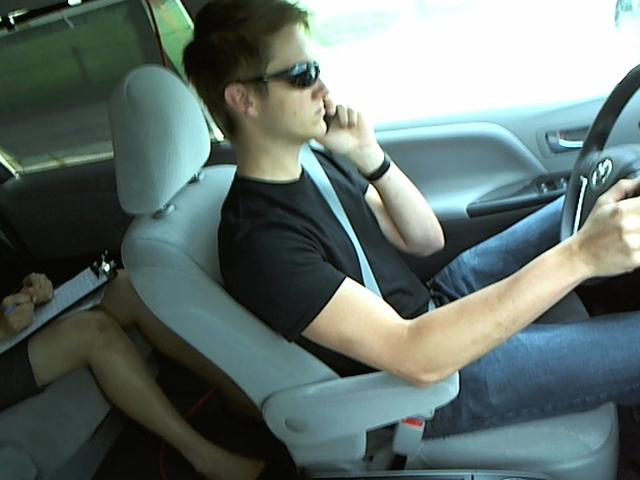

In [32]:
#You can verify the column ordering by viewing some images
from PIL import Image
Image.open(test_path + filenames[2])

In [33]:
#Save our test results arrays so we can use them again later
save_array(results_path + 'test_preds.dat', preds)
save_array(results_path + 'filenames.dat', filenames)

# Validate Predictions

Keras' *fit()* function conveniently shows us the value of the loss function, and the accuracy, after every epoch ("*epoch*" refers to one full run through all training examples). The most important metrics for us to look at are for the validation set, since we want to check for over-fitting. 

- **Tip**: with our first model we should try to overfit before we start worrying about how to reduce over-fitting - there's no point even thinking about regularization, data augmentation, etc if you're still under-fitting! (We'll be looking at these techniques shortly).

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

Calculate predictions on validation set, so we can find correct and incorrect examples:

In [12]:
latest_weights_filename = 'ft%d.h5' % (no_of_epochs - 1)

In [13]:
vgg.model.load_weights(results_path+latest_weights_filename)

In [14]:
val_batches, probs = vgg.test(valid_path, batch_size = batch_size)

Found 2000 images belonging to 10 classes.


In [21]:
filenames = val_batches.filenames
expected_labels = val_batches.classes #0 to 9

#Round our predictions to 0/1 to generate labels
our_labels= np.argmax(probs, axis=1)
our_predictions = np.amax(probs, axis=1)

In [22]:
print expected_labels[:5]

[0 0 0 0 0]


In [23]:
print our_labels[:5]


[0 0 8 0 0]


In [24]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

Found 894 correct labels
['-' '-' '-' '-']
['0' '7' '6' '7' '-' '-' '-' '-' '1.0' '1.0' '1.0' '1.0']
['0-1.000000', '7-1.000000', '6-1.000000', '7-1.000000']


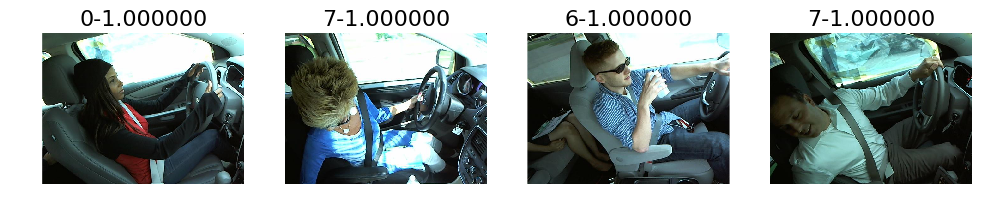

In [45]:
#1. A few correct labels at random
correct = np.where(our_labels==expected_labels)[0]
print "Found %d correct labels" % len(correct)
idx = permutation(correct)[:n_view]
#plots_idx(idx, our_predictions[idx])
sep = np.repeat('-', idx.size)
print sep
print np.concatenate((our_labels[idx], sep, our_predictions[idx]))
title = [ "%s-%f" % (our_labels[i],our_predictions[i]) for i in idx]
print title
plots_idx(idx, title)

Found 1106 incorrect labels


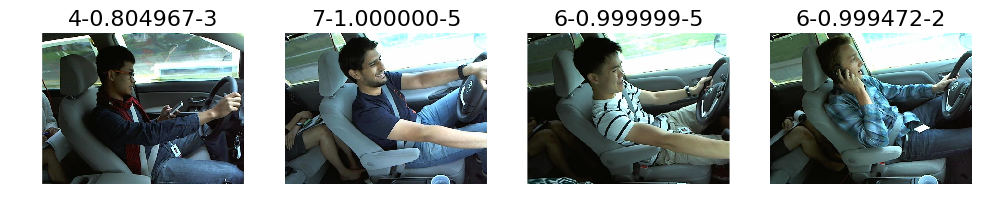

In [46]:
#2. A few incorrect labels at random
incorrect = np.where(our_labels!=expected_labels)[0]
print "Found %d incorrect labels" % len(incorrect)
idx = permutation(incorrect)[:n_view]
title = [ "%s-%f-%s" % (our_labels[i],our_predictions[i],expected_labels[i]) for i in idx]
plots_idx(idx, title)

Perhaps the most common way to analyze the result of a classification model is to use a [confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). Scikit-learn has a convenient function we can use for this purpose:

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)

[[182   0   0   0   7   0   4   5   2   0]
 [ 25   0   0   0  19   0 122  20  14   0]
 [  9   0   0   0  11   0 100  21  59   0]
 [ 11   0   0   0 162   0  25   1   1   0]
 [  0   0   0   0 197   0   1   2   0   0]
 [ 40   0   0   0  42   0  78  36   4   0]
 [  0   0   0   0   9   0 187   1   3   0]
 [  1   0   0   0   2   0   3 187   7   0]
 [  4   0   0   0  14   0  25  16 141   0]
 [ 82   0   0   0  37   0  30  28  23   0]]


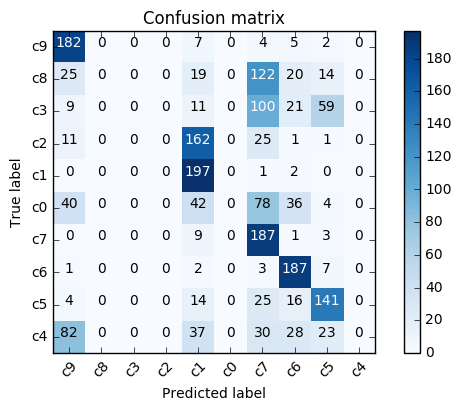

In [48]:
plot_confusion_matrix(cm, val_batches.class_indices)

## Submit Predictions to Kaggle!

In [50]:
#Load our test predictions from file
preds = load_array(results_path + 'test_preds.dat')
filenames = load_array(results_path + 'filenames.dat')

In [57]:
print filenames[:5]
ids = np.array([f[8:] for f in filenames])
print ids[:5]
print preds[:5]

['unknown/img_81601.jpg' 'unknown/img_14887.jpg' 'unknown/img_62885.jpg' 'unknown/img_45125.jpg'
 'unknown/img_22633.jpg']
['img_81601.jpg' 'img_14887.jpg' 'img_62885.jpg' 'img_45125.jpg' 'img_22633.jpg']
[[  1.6108e-13   0.0000e+00   0.0000e+00   0.0000e+00   8.4715e-17   0.0000e+00   1.0000e+00
    8.2288e-15   1.4051e-17   0.0000e+00]
 [  4.3283e-01   0.0000e+00   4.5271e-40   0.0000e+00   8.6810e-20   0.0000e+00   5.6684e-01
    3.3085e-04   4.2219e-10   0.0000e+00]
 [  5.9360e-39   0.0000e+00   0.0000e+00   0.0000e+00   1.0000e+00   0.0000e+00   6.6658e-14
    7.0065e-45   3.7979e-11   0.0000e+00]
 [  6.8690e-32   0.0000e+00   6.0568e-41   0.0000e+00   2.8845e-09   0.0000e+00   1.8804e-08
    1.3589e-13   1.0000e+00   0.0000e+00]
 [  3.0687e-16   0.0000e+00   1.8161e-41   0.0000e+00   6.3289e-15   0.0000e+00   9.9999e-01
    6.3986e-10   8.6586e-06   0.0000e+00]]


In [60]:
subm = np.column_stack([ids,preds[:]], axis=1)
subm[:5]

TypeError: column_stack() got an unexpected keyword argument 'axis'